## Wall Robot Navigation

In [2]:
from IPython.display import Video
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

A Wall following Robot is desined to move along a wall without hitting.There will be obstacles in its path and the robot has to make decisions which direction to move and roam around the environment in which it is placed.There will be sensors mounted on the robot which are used to calculate the distances of the obstacles and the walls which are fed into the Robot algorithms to make decisions.

The following video illustrates the working of a Wall following Robot

In [5]:
Video(url = 'sample_folder/videoplayback.mp4',embed = True)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [10]:
Video("videoplayback.mp4")

The following study on wall following is made Using SCITOS G5 Robot while navigating a room in a clock wise direction for 4 rounds, using 24 ultrasound sensors arranged circularly around its waist.24 ultrasound readings and the simplified distances were collected at the same time step, so each file has the same number of rows (one for each sampling time step).

## SCITOS G5

<img src = 'https://github.com/Rupakanth/EdYoda/blob/master/sample_folder/SCITOS%20G5.png?raw=true'>

* Intel Core Duo Processor 1.6 or 2.0GHz
* 2GB of RAM 
* 120GB of HD

## Algorithm for the Wall-Following 



## Environment from which data is collected

<img src = 'https://github.com/Rupakanth/EdYoda/blob/master/sample_folder/Environment.jpg?raw=true'>`

## Perception and Trajectory of environment by SCITOS G5

<img src = 'https://github.com/Rupakanth/EdYoda/blob/master/sample_folder/Normal%20trajectory.jpg?raw=true' >

Logigistic Perceptron(LP) -- Single Layered Neural Network architecture        
MLP -- Multilayer Perceptron              
ME -- Mixture of Experts

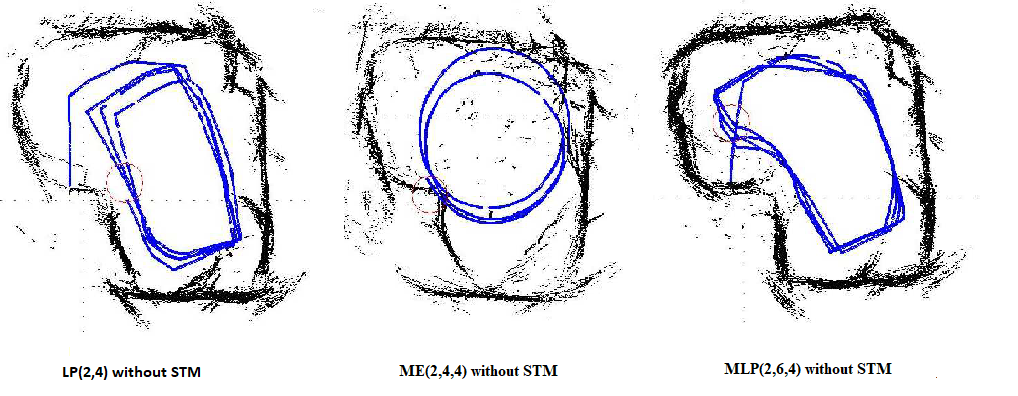

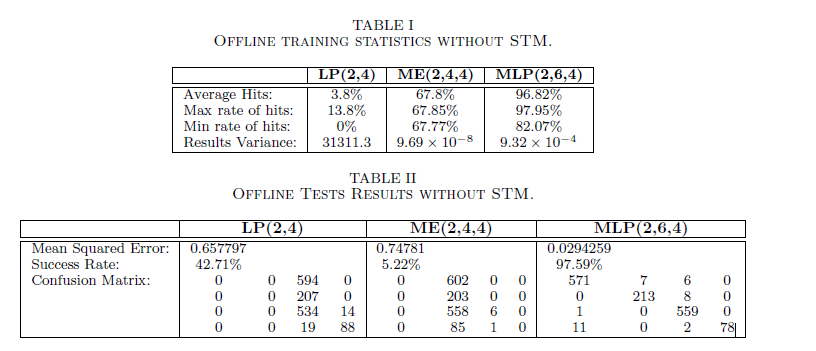

## with STM

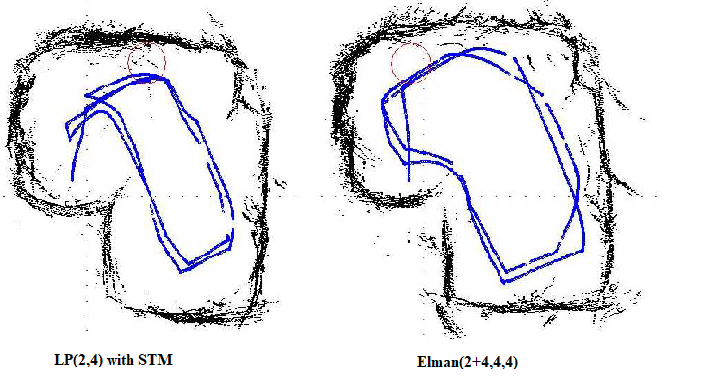

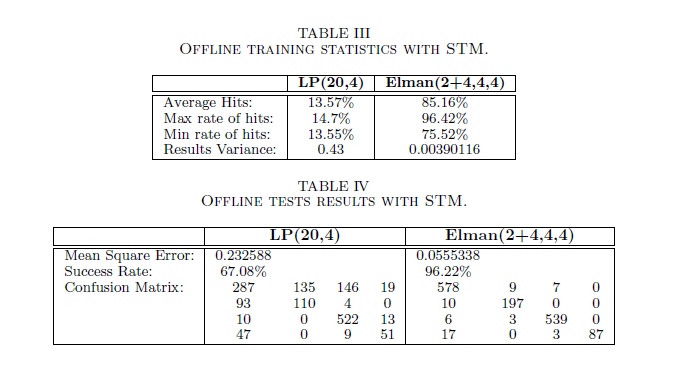

Now lets see how Machine learning Algorithms perform to do this task

In [5]:
# Reading the Data
Readings = pd.read_csv('Wall Robot Navigation.csv')

In [6]:
Readings.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,4
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,4
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,4
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,4
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,4


In [7]:
Readings.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.0,5.0,1.562,1
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.0,5.0,1.085,2
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.0,5.0,1.105,2
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.0,5.0,1.118,1
5455,0.950,4.066,5.000,2.819,2.798,2.570,2.422,1.016,1.739,0.964,...,0.635,0.618,0.628,0.776,5.000,1.083,5.0,5.0,1.168,2


In [8]:
Readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
V1       5456 non-null float64
V2       5456 non-null float64
V3       5456 non-null float64
V4       5456 non-null float64
V5       5456 non-null float64
V6       5456 non-null float64
V7       5456 non-null float64
V8       5456 non-null float64
V9       5456 non-null float64
V10      5456 non-null float64
V11      5456 non-null float64
V12      5456 non-null float64
V13      5456 non-null float64
V14      5456 non-null float64
V15      5456 non-null float64
V16      5456 non-null float64
V17      5456 non-null float64
V18      5456 non-null float64
V19      5456 non-null float64
V20      5456 non-null float64
V21      5456 non-null float64
V22      5456 non-null float64
V23      5456 non-null float64
V24      5456 non-null float64
Class    5456 non-null int64
dtypes: float64(24), int64(1)
memory usage: 1.0 MB


In [9]:
Readings.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508,1.958761
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480,1.033599
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000,1.000000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000,1.000000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000,2.000000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250,2.000000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


Each column represents the reference angles(Sensor positions) with respective SCITOS G5 using which distances are calculated between the robot and the wall which are passed to the algorithm to make the decisions of might moment is to be made

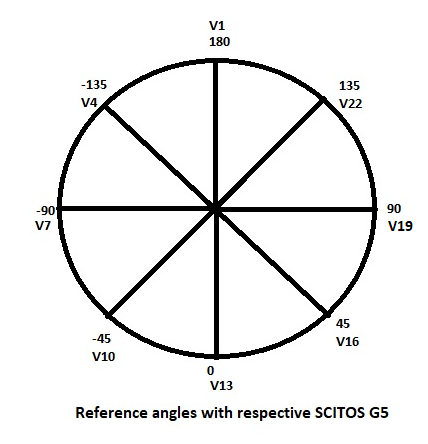

In [11]:
Readings.columns[:-1]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24'],
      dtype='object')

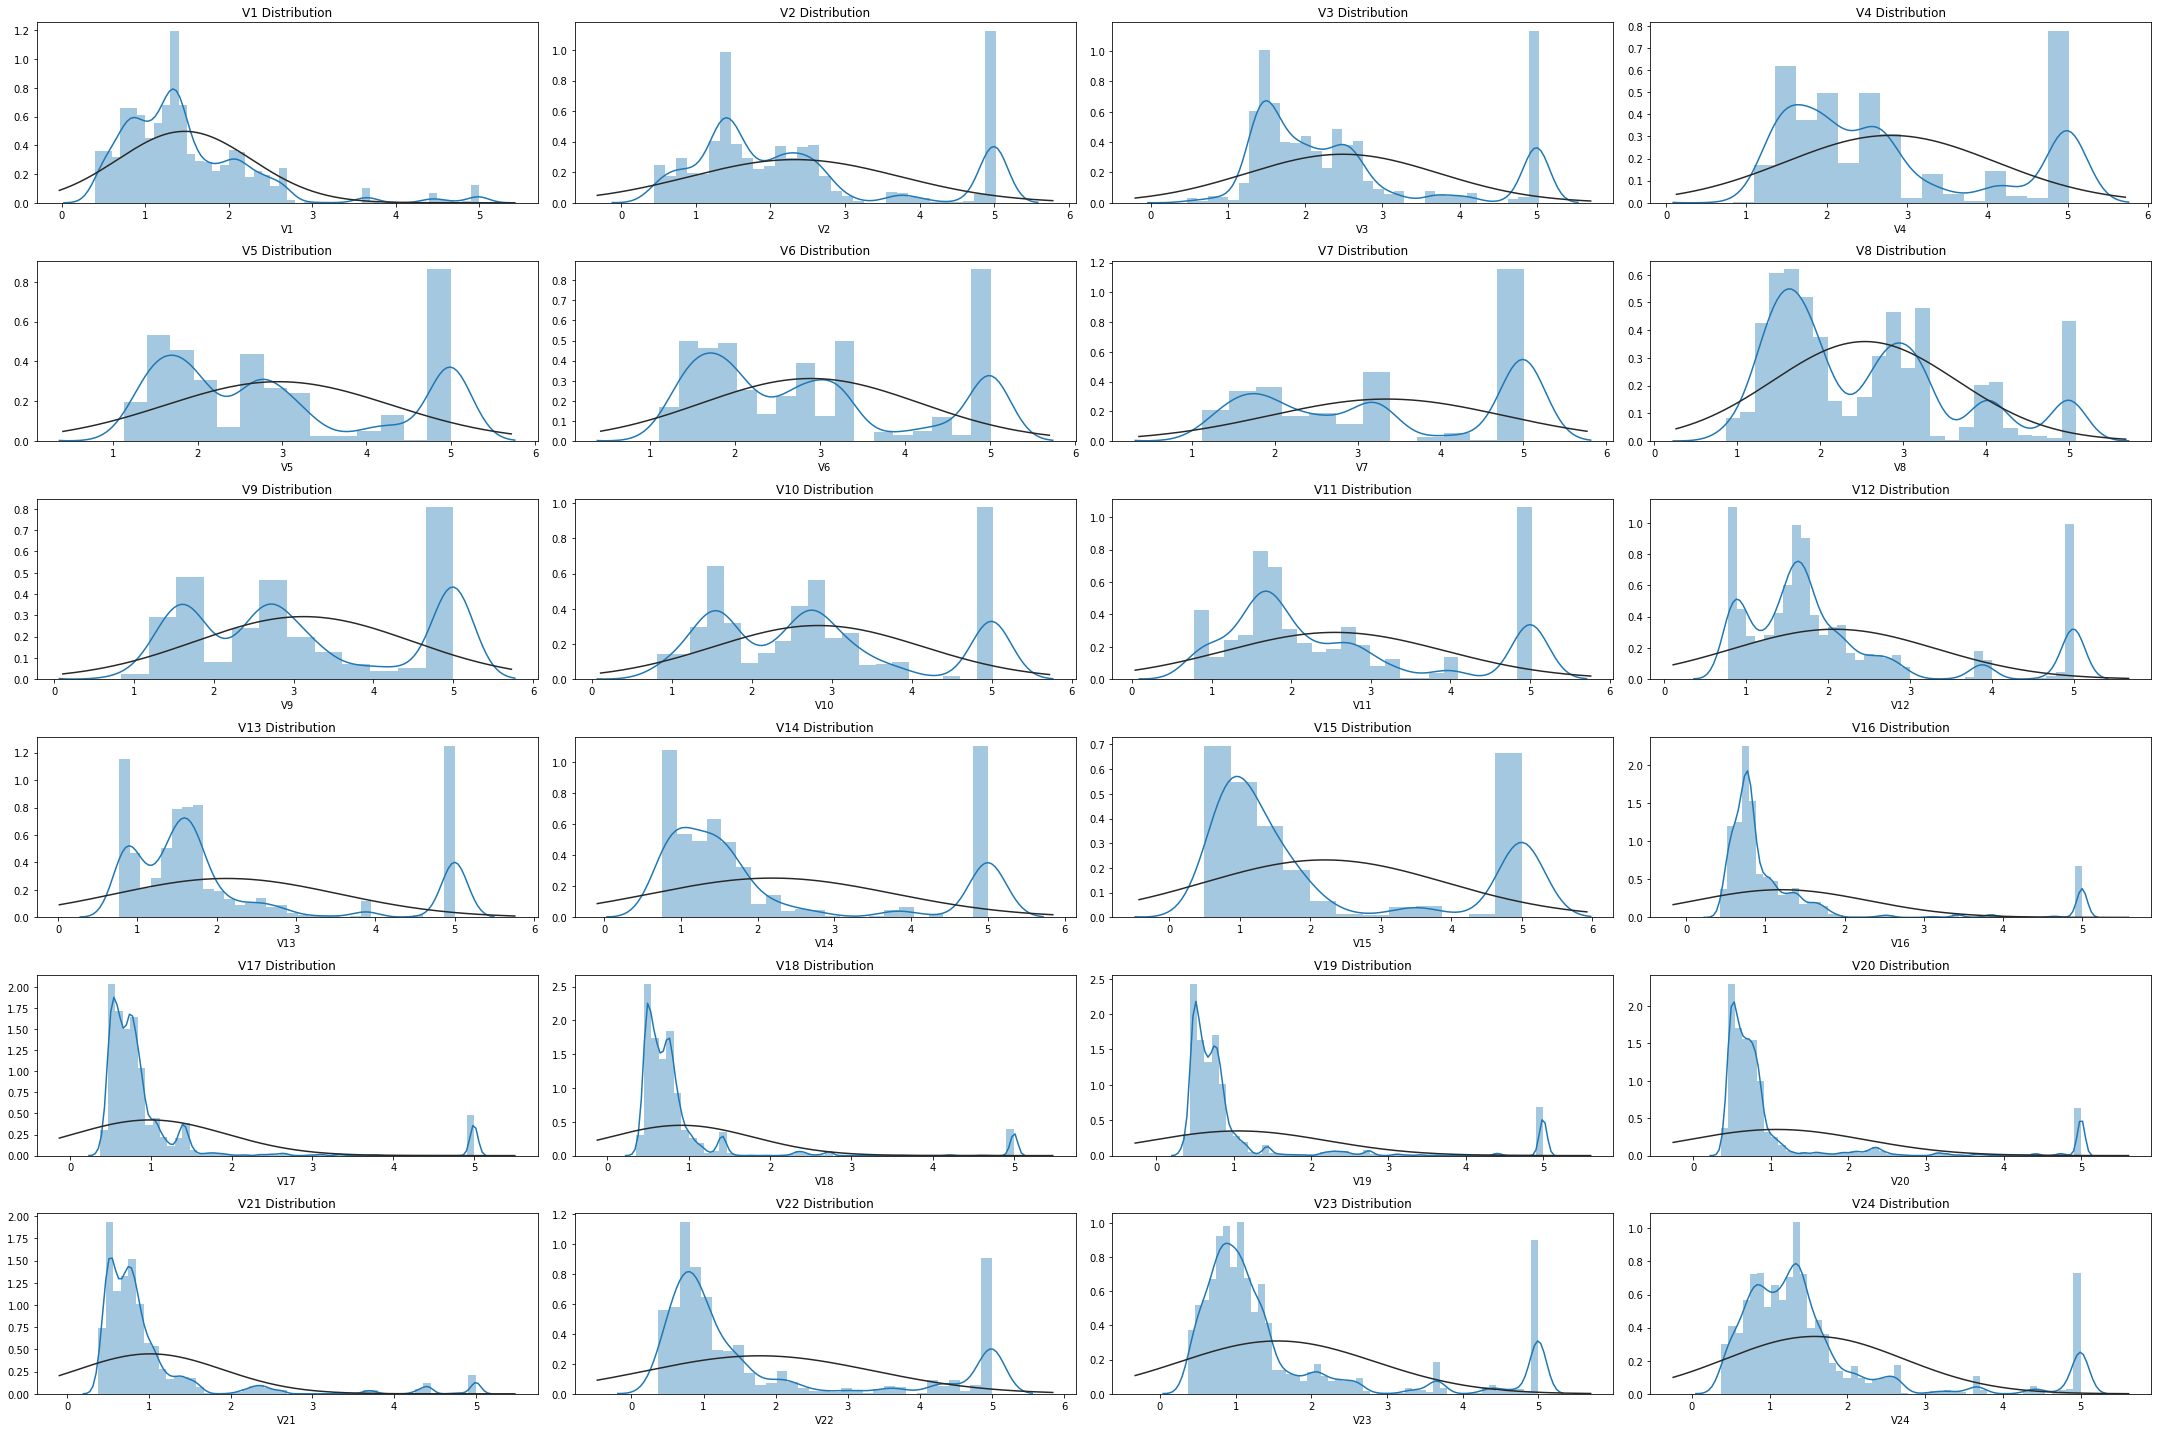

In [236]:
fig = plt.figure(figsize = (30,20))
for i, feature in enumerate(Readings.columns[:-1]):
    ax = fig.add_subplot(6,4,i+1)
    sns.distplot(Readings[feature],fit = norm)
    ax.set_title(feature+' Distribution')
    
fig.tight_layout()
plt.show()
    
    

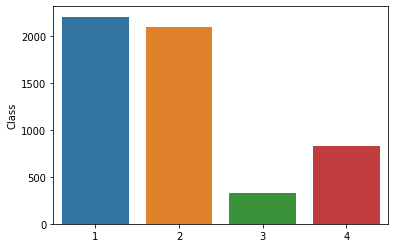

In [13]:
Class_counts = pd.DataFrame(Readings.Class.value_counts())
sns.barplot(Class_counts.index,
            Class_counts.Class);

The class labels are:          
1. Move-Forward        
2. Slight-Right-Turn          
3. Sharp-Right-Turn         
4. Slight-Left-Turn         

As we see that SCITOS G5 rotates in clock wise direction there are more right turns compared to the left in the environment, the above plot matches with the observation we have.

We can see that the classes are imbalenced , lets balance them using RandomOverSampler

In [16]:
trainX, testX, trainY, testY = train_test_split(Readings.drop(columns = 'Class'), Readings.Class)

## Knn Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
pipeline_knn = make_pipeline(RandomOverSampler(),PCA(n_components= 10), KNeighborsClassifier())

In [284]:
pipeline_knn

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [285]:
params_knn = {'kneighborsclassifier__n_neighbors':[5,6,7,8,9],'pca__n_components':[10,11,12,13,14,15]}

In [286]:
rs_knn = RandomizedSearchCV(pipeline_knn, params_knn, cv =5, n_jobs = 3 )

In [287]:
rs_knn.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [288]:
rs_knn.best_score_

0.8284457478005866

Training Accuracy : 0.9010263929618768
Testing Accuracy : 0.874633431085044
********** Confusion Matrix **********

Classification Report

                   precision    recall  f1-score   support

     Move-Forward       0.90      0.85      0.87       549
Slight-Right-Turn       0.93      0.86      0.89       538
 Sharp-Right-Turn       0.71      0.97      0.82        74
 Slight-Left-Turn       0.79      0.94      0.85       203

         accuracy                           0.87      1364
        macro avg       0.83      0.91      0.86      1364
     weighted avg       0.88      0.87      0.88      1364



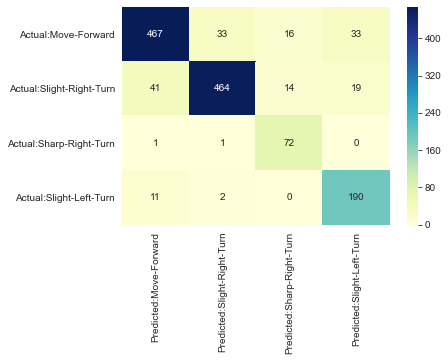

In [291]:
print('Training Accuracy :',rs_knn.score(trainX,trainY))
print('Testing Accuracy :',rs_knn.score(testX,testY))
y_pred = rs_knn.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

In [246]:
Comp = {'Knn':rs_knn.score(testX,testY)}

## Decision Tree

In [292]:
pipeline_dt = make_pipeline(RandomOverSampler(),PCA(n_components =10), DecisionTreeClassifier())

In [293]:
pipeline_dt

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
              

In [294]:
params_dt = {'pca__n_components':[10,11,12,13],
              'decisiontreeclassifier__criterion':['gini','entropy'],
             'decisiontreeclassifier__max_depth':[14,16,18,20]}

In [295]:
rs_dt = RandomizedSearchCV(pipeline_dt, param_distributions = params_dt, cv=5, n_jobs = 4)

In [296]:
rs_dt.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [297]:
rs_dt.best_params_

{'pca__n_components': 11,
 'decisiontreeclassifier__max_depth': 16,
 'decisiontreeclassifier__criterion': 'entropy'}

In [298]:
rs_dt.best_score_

0.8015640273704789

Training Accuracy : 0.9875366568914956
Testing Accuracy : 0.8233137829912024
********** Confusion Matrix **********

Classification Report

                   precision    recall  f1-score   support

     Move-Forward       0.82      0.79      0.80       549
Slight-Right-Turn       0.88      0.85      0.87       538
 Sharp-Right-Turn       0.73      0.88      0.80        74
 Slight-Left-Turn       0.74      0.81      0.77       203

         accuracy                           0.82      1364
        macro avg       0.79      0.83      0.81      1364
     weighted avg       0.83      0.82      0.82      1364



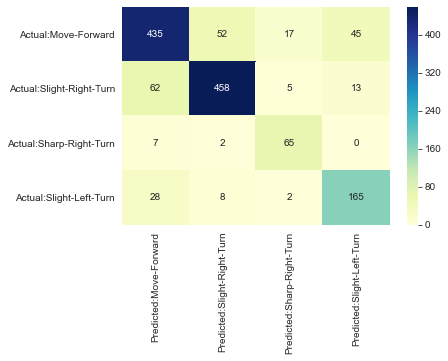

In [299]:
print('Training Accuracy :',rs_dt.score(trainX,trainY))
print('Testing Accuracy :',rs_dt.score(testX,testY))
y_pred = rs_dt.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

* The DecisionTree is model is over fitting  with the best parameters, lets use plain decision tree model

In [63]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(trainX,trainY)
print('Training Accuracy :',dt.score(trainX,trainY))
print('Testing Accuracy :',dt.score(testX,testY))
y_pred = dt.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 1.0
Testing Accuracy : 0.9941348973607038
********** Confusion Matrix **********
[[543   1   1   4]
 [  1 536   0   1]
 [  0   0  74   0]
 [  0   0   0 203]]


In [300]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(trainX,trainY)
print('Training Accuracy :',dt.score(trainX,trainY))
print('Testing Accuracy :',dt.score(testX,testY))
y_pred = dt.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.999266862170088
Testing Accuracy : 0.9919354838709677
********** Confusion Matrix **********
[[543   1   1   4]
 [  2 535   0   1]
 [  0   0  74   0]
 [  2   0   0 201]]


In [301]:
top_features = list(Readings.columns[:-1][dt.feature_importances_>0.05])
top_features

['V12', 'V15', 'V18', 'V19', 'V20']

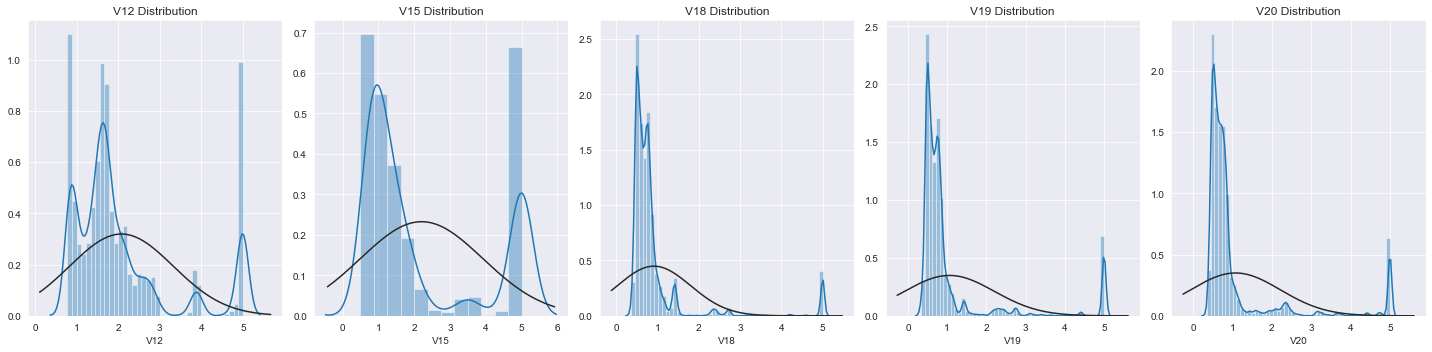

In [302]:
fig = plt.figure(figsize = (20,5))
for i, feature in enumerate(top_features):
    ax = fig.add_subplot(1,5,i+1)
    sns.distplot(Readings[feature],fit = norm)
    ax.set_title(feature+' Distribution')
    
fig.tight_layout()
plt.show()
    
    

Training Accuracy : 0.99
Testing Accuracy : 0.99
********** Confusion Matrix **********

Classification Report

                   precision    recall  f1-score   support

     Move-Forward       0.98      1.00      0.99       540
Slight-Right-Turn       1.00      0.98      0.99       531
 Sharp-Right-Turn       0.99      0.97      0.98        93
 Slight-Left-Turn       0.99      1.00      1.00       200

         accuracy                           0.99      1364
        macro avg       0.99      0.99      0.99      1364
     weighted avg       0.99      0.99      0.99      1364



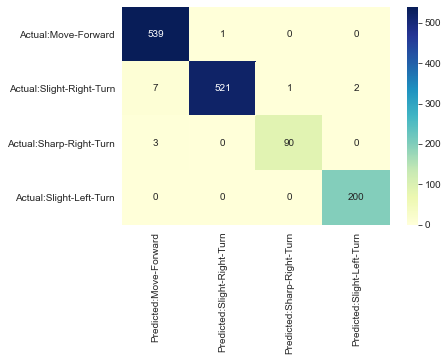

In [303]:
dt = DecisionTreeClassifier(max_depth = 8)
X_train, X_test, Y_train, Y_test = train_test_split(Readings[top_features], Readings.Class)
dt.fit(X_train,Y_train)
print('Training Accuracy :',np.round(dt.score(X_train,Y_train),2))
print('Testing Accuracy :',np.round(dt.score(X_test,Y_test),2))
y_pred = dt.predict(X_test)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = Y_test),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = Y_test,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

Decision Tree is able to get 99 percent accuracy with just 5 features

In [249]:
Comp['Decision_Tree'] = np.round(dt.score(X_test,Y_test),2)

## Logistic Regression

In [101]:
pipeline_lr = make_pipeline(RandomOverSampler(),PCA(n_components=10),LogisticRegression())


In [102]:
pipeline_lr

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

using hyperparameter tuning to find the Best polynomial degree

In [106]:
params_lr = {'pca__n_components':[10,12,14,24]}

In [107]:
rs_lr = RandomizedSearchCV(pipeline_lr,param_distributions=  params_lr, cv = 5, n_jobs = 3 )

In [108]:
rs_lr.fit(trainX,trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [109]:
rs_lr.best_score_

0.6652003910068426

In [110]:
rs_lr.best_params_

{'pca__n_components': 24}

In [111]:
print('Training Accuracy :',rs_lr.score(trainX,trainY))
print('Testing Accuracy :',rs_lr.score(testX,testY))
y_pred = rs_lr.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.6673998044965787
Testing Accuracy : 0.6517595307917888
********** Confusion Matrix **********
[[324  81  60  84]
 [ 67 329  45  97]
 [  1   7  66   0]
 [ 24   6   3 170]]


Since the accuarcy is less lets try using polynomial features to find the best degree of features that is related to the target

In [133]:
for i in range(1,5):
    pol = PolynomialFeatures(degree = i)
    feature_n = pol.fit_transform(Readings.drop(columns = 'Class'))
    X_train,X_test, Y_train, Y_test = train_test_split(Readings.drop(columns = 'Class'),Readings.Class)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    print('Training Accuracy for degree :',i,':',lr.score(X_train,Y_train))
    print('Testung Accuracy for degree :',i,':',lr.score(X_test,Y_test))
    y_pred = lr.predict(X_test)
    con_mat = confusion_matrix(y_pred = y_pred, y_true = Y_test)
    print('*'*10,'Confusion Matrix','*'*10)
    print(con_mat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy for degree : 1 : 0.6974584555229717
Testung Accuracy for degree : 1 : 0.6730205278592375
********** Confusion Matrix **********
[[359 124   3  11]
 [ 97 434   8  24]
 [ 24  31  35   0]
 [ 56  64   4  90]]
Training Accuracy for degree : 2 : 0.9682306940371457
Testung Accuracy for degree : 2 : 0.9002932551319648
********** Confusion Matrix **********
[[468  37   2  16]
 [ 34 512   1   5]
 [  2   2  70   0]
 [ 28   9   0 178]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy for degree : 3 : 0.9995112414467253
Testung Accuracy for degree : 3 : 0.9266862170087976
********** Confusion Matrix **********
[[496  18   5  10]
 [ 32 527   3   2]
 [  5   4  65   0]
 [ 19   2   0 176]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy for degree : 4 : 1.0
Testung Accuracy for degree : 4 : 0.9244868035190615
********** Confusion Matrix **********
[[541  21   3  13]
 [ 20 459   5   6]
 [  4   3  75   1]
 [ 22   5   0 186]]


* We see that Degree2 is best suited with reasonably good accuray

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy for degree : 2 : 0.9626099706744868
Testung Accuracy for degree : 2 : 0.906158357771261
********** Confusion Matrix **********

Classification Report

                   precision    recall  f1-score   support

     Move-Forward       0.91      0.91      0.91       584
Slight-Right-Turn       0.91      0.93      0.92       495
 Sharp-Right-Turn       0.86      0.88      0.87        80
 Slight-Left-Turn       0.89      0.85      0.87       205

         accuracy                           0.91      1364
        macro avg       0.89      0.89      0.89      1364
     weighted avg       0.91      0.91      0.91      1364



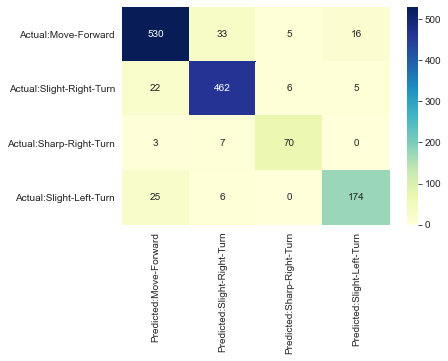

In [304]:
pol = PolynomialFeatures(degree = 2)
feature_n = pol.fit_transform(Readings.drop(columns = 'Class'))
X_train,X_test, Y_train, Y_test = train_test_split(feature_n,Readings.Class)
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print('Training Accuracy for degree :',2,':',lr.score(X_train,Y_train))
print('Testung Accuracy for degree :',2,':',lr.score(X_test,Y_test))
y_pred = lr.predict(X_test)
con_mat = confusion_matrix(y_pred = y_pred, y_true = Y_test)
cm = pd.DataFrame(con_mat,
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = Y_test,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlGnBu');


In [252]:
Comp['Logistic_Regression'] = lr.score(X_test,Y_test)

## RandomForestClassifier

In [143]:
pipeline_rf_pca = make_pipeline(RandomOverSampler(),PCA(n_components=10), RandomForestClassifier())

In [144]:
pipeline_rf_pca

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                          

In [145]:
params_rf_pca = {'pca__n_components':[10,11,12,13,14],
             'randomforestclassifier__max_depth':[10,12,14,16],
            'randomforestclassifier__n_estimators':[500,600,800,1000]}

In [146]:
rs_rf_pca = RandomizedSearchCV(pipeline_rf,params_rf_pca,cv =5, n_jobs =3)

In [147]:
rs_rf_pca.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [148]:
rs_rf_pca.best_params_

{'randomforestclassifier__n_estimators': 1000,
 'randomforestclassifier__max_depth': 16,
 'pca__n_components': 13}

In [149]:
rs_rf_pca.best_score_

0.8797653958944281

In [150]:
rs_rf_pca.score(testX,testY)

0.8878299120234604

In [151]:
print('Training Accuracy :',rs_rf_pca.score(trainX,trainY))
print('Testing Accuracy :',rs_rf_pca.score(testX,testY))
y_pred = rs_rf_pca.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.9980449657869013
Testing Accuracy : 0.8878299120234604
********** Confusion Matrix **********
[[466  49   7  27]
 [ 23 499   4  12]
 [  1   4  69   0]
 [ 22   4   0 177]]


* Without PCA

In [152]:
pipeline_rf = make_pipeline(RandomOverSampler(), RandomForestClassifier())

In [153]:
pipeline_rf

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=None,
                                        oob_score=False, random_state=None,
       

In [154]:
params_rf = {'randomforestclassifier__max_depth':[10,12,14,16],
            'randomforestclassifier__n_estimators':[500,600,800,1000]}

In [155]:
rs_rf = RandomizedSearchCV(pipeline_rf,params_rf,cv =5, n_jobs =3)

In [156]:
rs_rf.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     m

In [157]:
rs_rf.best_params_

{'randomforestclassifier__n_estimators': 600,
 'randomforestclassifier__max_depth': 16}

In [158]:
rs_rf.best_score_

0.9921798631476051

In [159]:
rs_rf.score(testX,testY)

0.9934017595307918

In [160]:
print('Training Accuracy :',rs_rf.score(trainX,trainY))
print('Testing Accuracy :',rs_rf.score(testX,testY))
y_pred = rs_rf.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 1.0
Testing Accuracy : 0.9934017595307918
********** Confusion Matrix **********
[[542   1   0   6]
 [  0 537   0   1]
 [  0   0  74   0]
 [  1   0   0 202]]


* Lets try plain Randmforest Model

In [305]:
pipeline_rf = make_pipeline(RandomOverSampler(), RandomForestClassifier(max_depth =5,n_estimators =500))

In [306]:
pipeline_rf

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
             

In [307]:
pipeline_rf.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
             

Training Accuracy : 0.99
Testing Accuracy : 0.98

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.99      0.97      0.98       549
Slight-Right-Turn       1.00      0.99      0.99       538
 Sharp-Right-Turn       0.95      0.99      0.97        74
 Slight-Left-Turn       0.94      1.00      0.97       203

         accuracy                           0.98      1364
        macro avg       0.97      0.99      0.98      1364
     weighted avg       0.98      0.98      0.98      1364


CONFUSION MATRIX



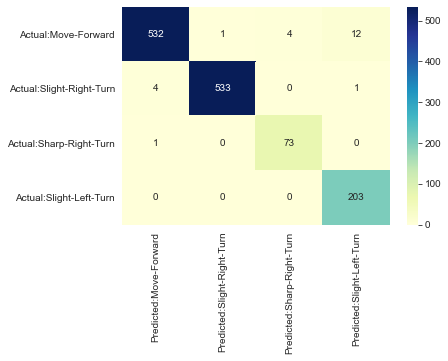

In [311]:
print('Training Accuracy :',np.round(pipeline_rf.score(trainX,trainY),2))
print('Testing Accuracy :',np.round(pipeline_rf.score(testX,testY),2))
y_pred = pipeline_rf.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])

# print('*'*10,'Confusion Matrix','*'*10)
# plt.figure(figsize= (6,4))
# sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

In [253]:
Comp['Random_Forest'] = np.round(pipeline_rf.score(testX,testY),2)

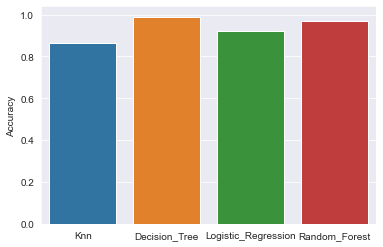

In [280]:
acc = pd.DataFrame.from_dict(Comp,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy);

Basic models of Decision Tree and RandomForest are performing better